## 선형회귀(Linear Regression)

In [16]:
# 사이킷런에서 당뇨병 환자 데이터 가져오기

from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [19]:
# 입력 데이터와 타깃 데이터의 크기 확인

print(diabetes.data.shape)
print(diabetes.target.shape)

(442, 10)
(442,)


> data는 442x10 크기의 2차원 배열이고, target은 442개의 요소를 가진 1차원 배열<br>
즉, 442명의 환자에 대한 10개의 특성과 타깃 값을 가진 데이터셋


In [41]:
# 입력 데이터 자세히 보기 : 데이터의 앞부분에서 3개만 보기 

diabetes.data[:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

In [42]:
# 타깃 데이터 자세히 보기 : 데이터의 앞부분에서 3개만 보기

diabetes.target[:3]

array([151.,  75., 141.])

### 컬럼의 의미
diabetes data set의 특성 목록
- age : 나이
- sex : 성별
- bmi : 체질량지수
- bp : 평균 혈압
- s1 : 혈청 수치 1(HDL 콜레스테롤 수치)
- s2 : 혈청 수치 2(LDL 콜레스테롤 수치)
- s3 : 혈청 수치 3(총 콜레스테롤 수치)
- s4 : 혈청 수치 4(혈청 트리글리세리드 수치)
- s5 : 혈청 수치 5(혈당 수치)
- s6 : 혈청 수치 6(기타 혈액 측정 수치)

diabetes target의 의미 : 1년 후의 당뇨병 진행 상황을 수치화 한 것



### 당뇨병 환자 데이터 시각화 하기

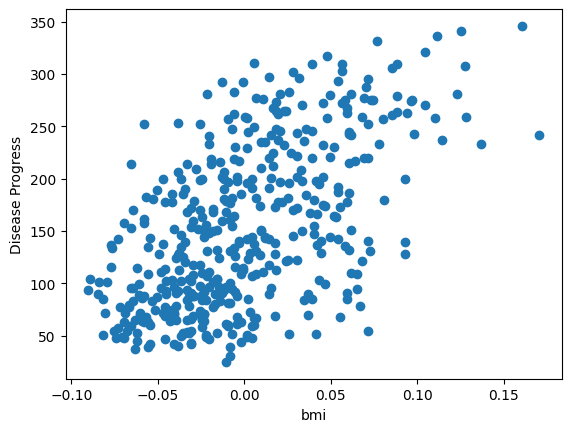

In [43]:
# 산점도 표현하기 : 3번째 특성(bmi) 선택
import matplotlib.pyplot as plt

plt.scatter(
  diabetes.data[:, 2], # x축 : 3번째 특성(bmi)
  diabetes.target # y축 : 당뇨병 진행 상황
)

plt.xlabel('bmi')
plt.ylabel('Disease Progress')
plt.show()


> x축은 diabetes.data의 3번째 특성(bmi)이고 y축은 diabetes.target(당뇨병 진행 상황)<br>
이 그래프를 보면 세번째 특성과 데이터 사이에 정비례관계가 있음을 알 수 있다.


In [44]:
# 데이터 준비하기
x = diabetes.data[:, 2]
y = diabetes.target

---
### 경사 하강법으로 학습하는 방법
: 산점도로 표현 되었을 때, 어떤 직선이 산점도의 기울기를 잘 표현하는 수식을 찾는 방법으로<br>
경사하강법은 모델이 데이터를 잘 표현할 수 있도록 기울기(변화율, Gradient)를 사용하여<br> 
모델을 조금씩 조정하는 최적화 알고리즘으로 딥러닝에 주로 사용됨

### 예측값으로 올바른 모델 찾기
- 훈련 데이터에 잘 맞는 w와 b를 찾는 방법(Y^ = wX + b)<br>
(1) 무작위로 w와 b를 정한다.<br>
(2) x에서 샘플 하나를 선택하여 y^를 계산한다.<br>
(3) y^와 선택한 샘플의 진짜 y를 비교한다.(예측값과 정답 비교하기)<br>
(4) y^이 y와 더 가까워지도록 w와 b를 조정한다.(모델 조정)<br>
(5) 모든 샘플이 처리될 때까지 (2)~(4)를 반복한다.

In [46]:
# 훈련 데이터에 맞는 w와 b를 찾기 위해 w와 b를 초기화

w = 1.0
b = 1.0

In [47]:
# 훈련 데이터에 첫번째 샘플 데이터로 y^ 계산하기
y_hat = w * x[0] + b  # 예측값 = 가중치 * 입력값 + 편향
y_hat

np.float64(1.0616962065186832)

In [48]:
y[0]

np.float64(151.0)

> 실제값과 예측의 차이가 많이 발생한다.

In [49]:
# 실제값과 가까워지기 위해 w와 b를 조금씩 변경해서 y_hat이 증가하는지 감소하는지 파악
# w를 0.1만큼 증가하자

w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
y_hat_inc


np.float64(1.0678658271705517)

> 첫번째 보다는 실제값에 조금 더 접근했다.

In [50]:
# w값을 조정한 후 예측값 증가 정도 확인하기
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate

np.float64(0.06169620651868429)

> w_rate를 변화율 이라 한다. 

w_rate = (y_hat_inc - y_hat) / (w_inc - w)  
= ((x[0] * w_inc + b) - (x[0] * w + b)) / (w_inc - w)  
= x[0] * (w_inc - w) / (w_inc - w)  
= x[0]

> 변화율은 결국 훈련 데이터의 첫번째 샘플인 x[0]이다.

---
### 변화율(Gradient: 경사, 기울기)로 가중치 및 절편 업데이트 하기

In [51]:
# 변화율로 가중치 업데이트 하기
w_new = w + w_rate
w_new

np.float64(1.0616962065186843)

In [52]:
# b를 0.1만큼 증가시킨 후 변화율로 절편 업데이트 하기
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.1616962065186833
1.0


b_rate = (y_hat_inc - y_hat) / (b_inc - b)     
= ((x[0] * w + b_inc) - (x[0] * w + b)) / (b_inc - b)     
= b_inc - b / b_inc - b = 1

> 변화율이 1이다. 즉 b가 1증가하면 y_hat도 1만큼 증가 한다.  
단순히 생각하면 b가 1증가하면 그래프의 위치가 y방향으로 1만큼 올라간다.   
즉, b를 업데이트 하기 위해서는 변화율이 1이므로 단순히 1을 더하면 된다.  

In [53]:
b_new = b + 1
b_new

2.0

---
### 오차 역전파(back propagation)로 가중치와 절편을 더 적절하게 업데이트 하기

#### 가중치와 절편을 더울 적절하게 업데이트 하는 방법
- 오차와 변화율을 곱하여 가중치 업데이트 하기

In [56]:
# x[0]일 때 w의 변화율과 b의 변화율에 오차를 곱한 다음 확인하기
err =y[0] - y_hat
w_new = w + w_rate * err # 변화율에 오차를 곱한다.
b_new = b + 1 * err
print(w_new, b_new)

10.250624555903848 150.9383037934813


In [57]:
# 두번째 샘플 x[1]을 사용하여 오차를 구하고 새로운 w와 b를 구한다.

y_hat = x[1] * w_new + b_new
err = y[1] - y_hat

w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380695 75.52764127612656


In [58]:
# 세번째 샘플 x[2]를 사용하여 오차를 구하고 새로운 w와 b를 구한다.

y_hat = x[2] * w_new + b_new
err = y[2] - y_hat

w_rate = x[2]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)


17.014719208776086 140.3718013346938


### 전체 샘플을 반복하기

In [59]:
a = [1,2,3]
b = [4,5,6]

for a_i, b_i in zip(a,b):
  print(a_i, b_i)

1 4
2 5
3 6


In [60]:
w = 1
b = 1
for x_i, y_i in zip(x, y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err

print(w, b)

587.8654539985616 99.4093556453094


### 산점도에 직선을 넣어 잘 되었는지 확인하기

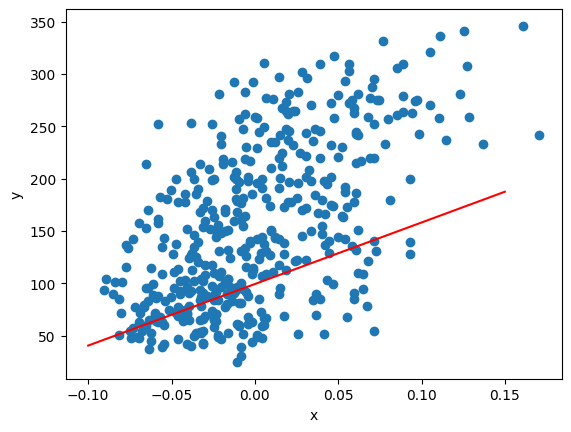

In [61]:
plt.scatter(x, y)

pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)

plt.plot(
  [pt1[0], pt2[0]],
  [pt1[1], pt2[1]],
  color = 'red'
)

plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [63]:
pt1 = (-0.1, -0.1 * w + b)
pt1

(-0.1, np.float64(40.62281024545324))

> 만족스럽지는 않지만 어느정도 표현한 것 같다.

---
### Epoch(에포크)로 반복하기
: 경사하강법에서는 보통 주어진 훈련데이터로 학습을 여러번 반복한다.  
이를 Epoch라고 한다.

In [64]:
# epoch 를 100번 반복하기

w = 1
b = 1

for _ in range(1, 100):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err

print(w, b)


913.5973364346786 123.39414383177173


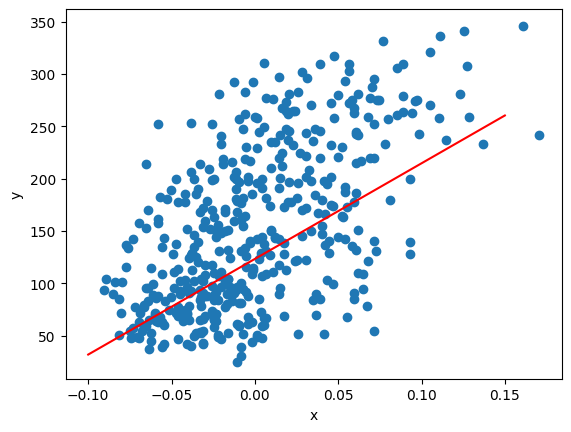

In [65]:
# 산점도에 직선을 넣어 잘 되었는지 확인하기

plt.scatter(x, y)

pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot(
  [pt1[0], pt2[0]],
  [pt1[1], pt2[1]],
  color = 'red'
)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Y^ = 913.6 * x + 123.4

In [66]:
# 예측 해보기

x_new = 0.18  # 가상의 환자의 bmi 값
y_pred = x_new * w + b  # 예측값
y_pred  

np.float64(287.8416643900139)

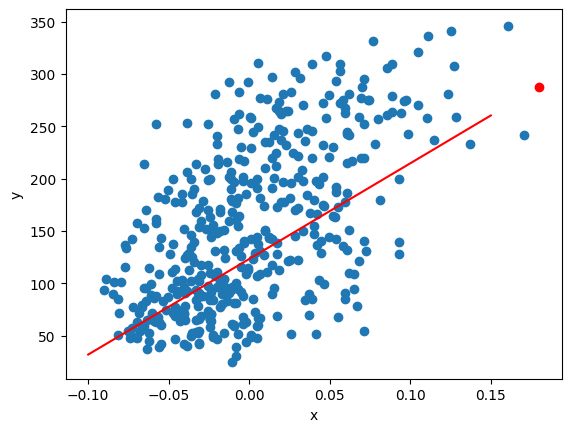

In [68]:
# 산점에도 직선을 넣어 잘 되었는지 확인하기

plt.scatter(x, y)
plt.scatter(x_new, y_pred, color = 'red')

pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot(
  [pt1[0], pt2[0]],
  [pt1[1], pt2[1]],
  color = 'red' 
)

plt.xlabel('x')
plt.ylabel('y')
plt.show()


---
## 손실함수와 경사 하강법

### 손실함수(Loss Function)란?
- 예상한 값과 실제값의 차이를 함수로 정의한 것  
- 손실함수의 차이를 줄이는 방법으로 경사 하강법을 사용  
- 대표적인 회귀(regression), 분류(classification) 모델에서 손실함수로 사용됨  
- 복잡한 다른 문제이서는 자신만의 손실함수를 정의하여 사용하기도 함  

### 회귀의 손실함수
- 제곱 오차(Squared Error)를 사용  
: 타깃값과 예측값을 뺀 다음 제곱한 것(음수가 되는 것을 방지)  
SE = (y - y^)^2  
==> 즉, 경사하강법은 손실함수의 기울기가 작은쪽으로 이동하는 알고리즘  

---
### 선형회귀 뉴런 만들기

In [73]:
class Neuron:
  # 초기화 작업
  def __init__(self):
    self.w = 1.0 # 가중치를 초기화
    self.b = 1.0 # 절편을 초기화

  # 정방향 계산(순전파)
  def forpass(self, x):
    y_hat = x * self.w + self.b # 직선 방정식을 계산
    return y_hat

  # 역방향 계산(역전파)(오차율)
  def backprop(self, x, err):
    w_grad = x * err # 가중치에 대한 그래디언트를 계산
    b_grad = 1 * err # 절편에 대한 그래디언트를 계산
    return w_grad, b_grad
  
  # 훈련
  def fit(self, x, y, epochs = 100): # 100은 기본값
    for _ in range(epochs):
      for x_i, y_i in zip(x, y):
        y_hat = self.forpass(x_i) # 정방향 계산
        err = y_i - y_hat # 오차 계산 -> 손실함수
        w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
        self.w += w_grad # 가중치 업데이트
        self.b += b_grad # 절편 업데이트
    
    return self.w, self.b # 최종 가중치와 절편 반환

In [74]:
# 사용해보기

neuron = Neuron()
neuron.fit(x, y, 100)

print(neuron.w, neuron.b)

913.5973364346786 123.39414383177173
